# Random Forest Classifier Project 2.0

In [1]:
#Import Necessary Libraries
import numpy as np
import pandas as pd

#For DataVisualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df=sns.load_dataset('titanic')

In [4]:
#Lets convet in data frame

In [6]:
data=pd.DataFrame(df)

In [7]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [9]:
data.shape

(891, 15)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         891 non-null    category
 12  embark_town  891 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [10]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [12]:
#We have null values firsty we have impute the all nan featurs

In [16]:
data['age']=data['age'].fillna(data['age'].mean())
data['deck']=data['deck'].fillna(data['deck'].mode()[0])
data['embark_town']=data['embark_town'].fillna(data['embark_town'].mode()[0])

In [18]:
data['embarked']=data['embarked'].fillna(data['embarked'].mode()[0])

In [19]:
#Lets check all null values are filled or not.
data.isna().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

In [20]:
#Now i see categorical value in our data lets convert in numbers by encoding method.

In [23]:
print(data.apply(lambda col:col.unique()))

survived                                                  [0, 1]
pclass                                                 [3, 1, 2]
sex                                               [male, female]
age            [22.0, 38.0, 26.0, 35.0, 29.69911764705882, 54...
sibsp                                      [1, 0, 3, 4, 2, 5, 8]
parch                                      [0, 1, 2, 5, 3, 4, 6]
fare           [7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....
embarked                                               [S, C, Q]
class          ['Third', 'First', 'Second']
Categories (3, ob...
who                                          [man, woman, child]
adult_male                                         [True, False]
deck           ['C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories...
embark_town                 [Southampton, Cherbourg, Queenstown]
alive                                                  [no, yes]
alone                                              [False, True]
dtype: object


In [25]:
#Endoing using label Encoder#'who','adult_male','deck','embark_town','alive','alone'

In [26]:
from sklearn.preprocessing import LabelEncoder

In [31]:
lab_enc=LabelEncoder()
df2=lab_enc.fit_transform(data[['sex']])
pd.Series(df2)
data['sex']=df2

In [37]:
df2=lab_enc.fit_transform(data[['who']])
pd.Series(df2)
data['who']=df2

In [45]:
df2=lab_enc.fit_transform(data[['adult_male']])
pd.Series(df2)
data['adult_male']=df2

In [46]:
df2=lab_enc.fit_transform(data[['deck']])
pd.Series(df2)
data['deck']=df2

In [47]:
df2=lab_enc.fit_transform(data[['embark_town']])
pd.Series(df2)
data['embark_town']=df2

In [48]:
df2=lab_enc.fit_transform(data[['alive']])
pd.Series(df2)
data['alive']=df2

In [49]:
df2=lab_enc.fit_transform(data[['alone']])
pd.Series(df2)
data['alone']=df2

In [59]:
df2=lab_enc.fit_transform(data[['embarked']])
pd.Series(df2)
data['embarked']=df2

And we have one column  is name is class its follow some order. So lets do Encoding Ordinal Encoder.

In [52]:
from sklearn.preprocessing import OrdinalEncoder

In [56]:
oe=OrdinalEncoder(categories=[['First','Second','Third']])
df2=oe.fit_transform(data[['class']])
data['class']=df2

In [57]:
data.describe()

,survived,pclass,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,1.308642,1.210999,0.602694,2.084175,1.536476,0.383838,0.602694
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.836071,0.594291,0.489615,0.705267,0.791503,0.486592,0.489615
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000,1.000000


So our preprocessing technique are done. Lets check relationship between feature vs feature vs labels.

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    int32  
 3   age          891 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     891 non-null    int32  
 8   class        891 non-null    float64
 9   who          891 non-null    int32  
 10  adult_male   891 non-null    int64  
 11  deck         891 non-null    int32  
 12  embark_town  891 non-null    int32  
 13  alive        891 non-null    int32  
 14  alone        891 non-null    int64  
dtypes: float64(3), int32(6), int64(6)
memory usage: 83.7 KB


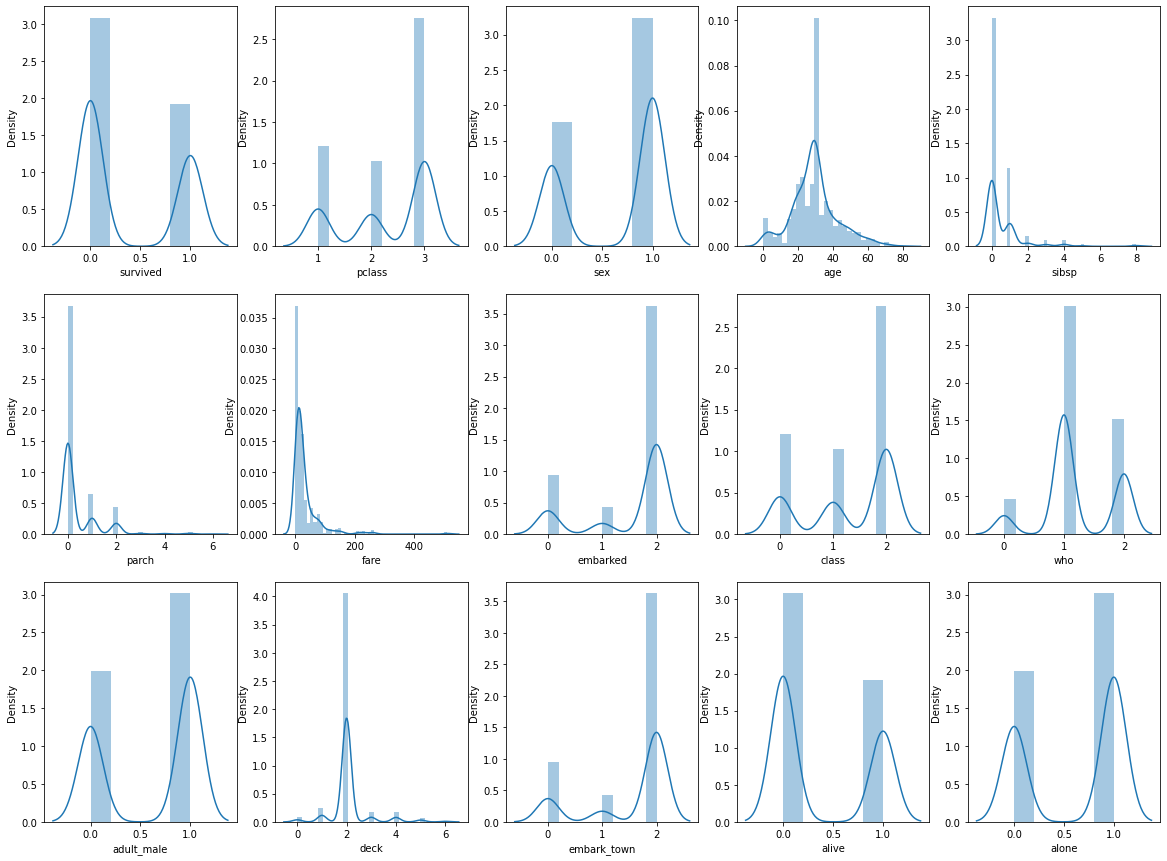

In [65]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in data:
    if plotnumber <=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [66]:
#We have littile bit outliers so we can remove that. by using z score.
from scipy.stats import zscore

In [70]:
z_score=zscore(data[['sibsp','parch','fare']])
z_abs=np.abs(z_score)
filtering_entry=(z_abs <3).all(axis=1)
data=data[filtering_entry]
data.describe()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,0.388150,2.305925,0.660218,30.153110,0.347037,0.253930,25.872727,1.538089,1.305925,1.220073,0.629988,2.101572,1.538089,0.388150,0.640871
std,0.487624,0.828956,0.473922,12.717126,0.617932,0.563922,29.763863,0.790033,0.828956,0.567424,0.483100,0.722744,0.790033,0.487624,0.480036
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,0.000000,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,13.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,0.000000,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,27.720800,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,3.000000,2.000000,164.866700,2.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000,1.000000


In [71]:
#Lets plot again the graph and check outliers removed or not .

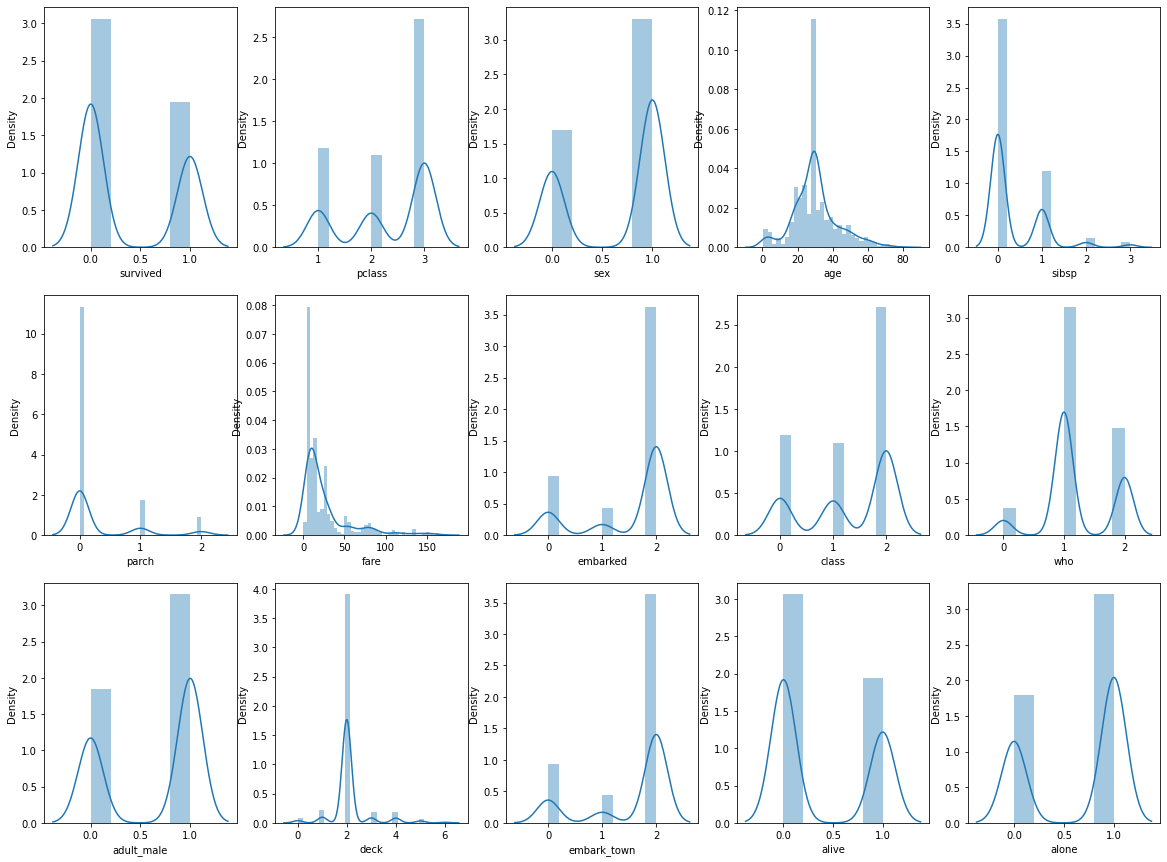

In [72]:
plt.figure(figsize=(20,15))
plotnumber = 1
for column in data:
    if plotnumber <=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber +=1
plt.show()

In [73]:
#Now our data is totally filtered  and we are good to check multicollinearity problem.
#Lets do with vif= Variance Inflation Factor

In [76]:
x=data.drop(columns=['survived'])
y=data.survived

In [75]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [77]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[ 0.83779463,  0.71739251, -0.64150056, ...,  0.58502596,
        -0.79648437, -1.3358562 ],
       [-1.57633833, -1.39393705,  0.61740669, ..., -1.94804455,
         1.25551742, -1.3358562 ],
       [ 0.83779463, -1.39393705, -0.32677375, ...,  0.58502596,
         1.25551742,  0.74858357],
       ...,
       [ 0.83779463, -1.39393705, -0.03572087, ...,  0.58502596,
        -0.79648437, -1.3358562 ],
       [-1.57633833,  0.71739251, -0.32677375, ..., -1.94804455,
         1.25551742,  0.74858357],
       [ 0.83779463,  0.71739251,  0.14531647, ..., -0.6815093 ,
        -0.79648437,  0.74858357]])

In [78]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,inf,pclass
1,12.558753,sex
2,1.624477,age
3,2.701905,sibsp
4,2.069879,parch
5,2.327835,fare
6,inf,embarked
7,inf,class
8,2.748025,who
9,11.654503,adult_male


In [79]:
#So we can finf multi collinearity problem in sex and adult_male
#Lets confirm with heat map

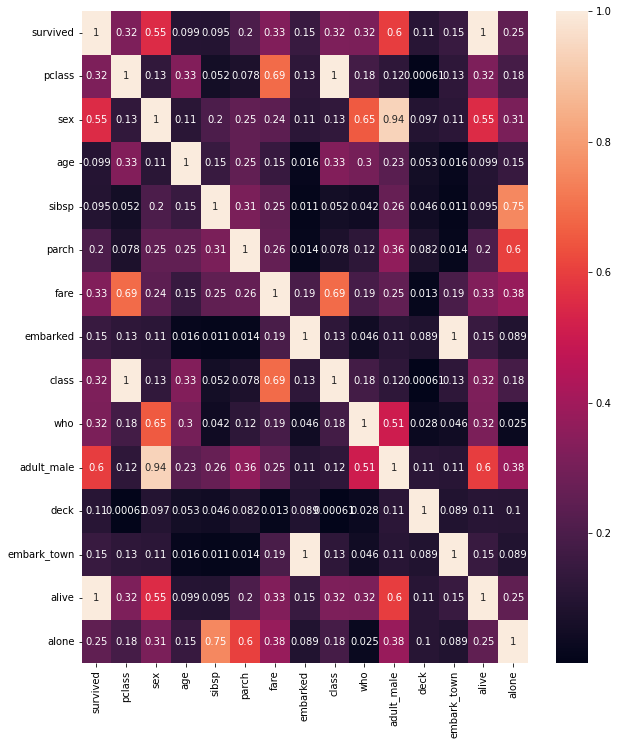

In [81]:
df=data.corr().abs()
plt.figure(figsize=(10,12))
sns.heatmap(df,annot=True)
plt.show()

In [82]:
#Here also we get a good relationship between age and adult_male.
#Lets confirm in scatter plot

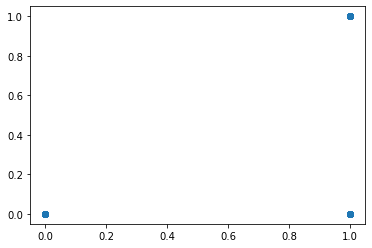

In [92]:
plt.scatter(data.sex,data.adult_male)
plt.show()

In [84]:
#In scatter plot we dont find any relation. so we are good to proceed.
#Lets do train test split.

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=9425)

In [89]:
#Lets create one fucntion for checking again and again the score .

In [100]:
def metrics_score(cnn,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=cnn.predict(x_train)
        print("=================Training Score=============")
        print("Accuracy Score==> ",accuracy_score(y_train,y_pred)*100)
    elif train== False:
        pred=cnn.predict(x_test)
        print("==================Testing Score=============")
        print("Accuracy Score==> ",accuracy_score(y_test,pred)*100)
        print("Classification Report==> ",classification_report(y_test,pred))
        

In [94]:
#Lets build a model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report

In [96]:
cnn=RandomForestClassifier()

In [97]:
cnn.fit(x_train,y_train)

RandomForestClassifier()

In [101]:
#Lets check score
metrics_score(cnn,x_train,x_test,y_train,y_test,train=True)
metrics_score(cnn,x_train,x_test,y_train,y_test,train=False)

=================Training Score=============
Accuracy Score==>  100.0
==================Testing Score=============
Accuracy Score==>  100.0
Classification Report==>                precision    recall  f1-score   support

           0       1.00      1.00      1.00       129
           1       1.00      1.00      1.00        78

    accuracy                           1.00       207
   macro avg       1.00      1.00      1.00       207
weighted avg       1.00      1.00      1.00       207



#Our model is overfitted lets do hyperparameter tuning lets know one thing in random forest its internally use Decision Tree Classifier So in hyperparameter tuning we use same parameter which we using in decision tree

In [102]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [113]:
algo={'n_estimators':[12,16],
     'min_samples_split':[10,12],
     'min_samples_leaf':[12,14],
     'max_depth':[10,12],
     'criterion':['entropy','gini']}

In [114]:
grid=GridSearchCV(cnn,param_grid=algo,cv=5)
grid.fit(x_train,y_train)
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 12,
 'min_samples_split': 12,
 'n_estimators': 16}

In [116]:
best=grid.best_estimator_

In [117]:
best.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_leaf=12,
                       min_samples_split=12, n_estimators=16)

In [119]:
#Lets check score
metrics_score(best,x_train,x_test,y_train,y_test,train=True)
metrics_score(best,x_train,x_test,y_train,y_test,train=False)

=================Training Score=============
Accuracy Score==>  98.06451612903226
==================Testing Score=============
Accuracy Score==>  95.65217391304348
Classification Report==>                precision    recall  f1-score   support

           0       0.93      1.00      0.97       129
           1       1.00      0.88      0.94        78

    accuracy                           0.96       207
   macro avg       0.97      0.94      0.95       207
weighted avg       0.96      0.96      0.96       207



In [120]:
#Now our model predict good.


In [ ]:
#Student of DataScience 
#Student of DataTrained - Saurav
#Date- 23-09-2022
#Time - 15:41